<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Code/train_CNNLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Entspannter/CrispCerebella/blob/main/Test_File.ipynb)

SyntaxError: ignored

In [14]:
!git clone https://github.com/Entspannter/CrispCerebella.git

fatal: destination path 'CrispCerebella' already exists and is not an empty directory.


In [15]:
pip install -q -U keras-tuner

In [16]:
import os 
import numpy as np
from google.colab import files
from tensorflow.keras.utils import to_categorical
import keras_tuner

In [17]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *


In [18]:
# load all train
trainX, trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of training Data:",trainX.shape, trainy.shape)
# load all test
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:",testX.shape, testy.shape)

Shape of training Data: (7352, 128, 9) (7352, 1)
Shape of test Data: (2947, 128, 9) (2947, 1)


In [19]:
# transform the output date into categorical (one-hot-encoding) and print the updated shapes
trainX, trainy, testX, testy = transform_dataset(trainX, trainy, testX, testy)

n_timesteps, n_features, N_OUTPUTS = trainX.shape[1], trainX.shape[2], trainy.shape[1]

n_steps, n_length = 4, 32

#reshape the X data
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
 
# define the inout share for the CNNLSTM model
INPUT_SHAPE=(None, n_timesteps,n_features)

# define input variable for the k-fold CV and the model estimation functions
Num_Epochs_Search = 40
Num_Epochs_Fit = 20
Max_Trials = 5
Num_K_Folds = 5
Model_Name_CNNLSTM = "CNNLSTM"
batch_size = 64

# merge the train and test data to recreate the initial dataset for later
# splitting in the k-fold process
X_CNNLSTM = np.concatenate((trainX, testX),axis=0)
y_CNNLSTM = np.concatenate((trainy, testy),axis=0)


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [20]:
# Hyperparameters tuning inside of k-fold CV
Best_HP_CNNLSTM, Best_Epoch_CNNLSTM= k_fold_cv(X_CNNLSTM,
                                                              y_CNNLSTM,
                                                              CNNLSTM,
                                                              Model_Name_CNNLSTM,
                                                              INPUT_SHAPE,
                                                              N_OUTPUTS,
                                                              Max_Trials,
                                                              Num_Epochs_Search,
                                                              Num_Epochs_Fit,
                                                              Num_K_Folds)


Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.8762136101722717

Best val_accuracy So Far: 0.9120145440101624
Total elapsed time: 00h 02m 51s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
206/206 [==============================] - 6s 18ms/step - loss: 0.3288 - accuracy: 0.8730 - val_loss: 0.3436 - val_accuracy: 0.8283
Epoch 2/20
206/206 [==============================] - 3s 13ms/step - loss: 0.1449 - accuracy: 0.9446 - val_loss: 0.2447 - val_accuracy: 0.8786
Epoch 3/20
206/206 [==============================] - 3s 13ms/step - loss: 0.1281 - accuracy: 0.9508 - val_loss: 0.2454 - val_accuracy: 0.8877
Epoch 4/20
206/206 [==============================] - 3s 13ms/step - loss: 0.1258 - accuracy: 0.9536 - val_loss: 0.2224 - val_accuracy: 0.9047
Epoch 5/20
206/206 [==============================] - 3s 13ms/step - loss: 0.1179 - accuracy: 0.9542 - val_loss: 0.2364 - val_accuracy: 0.8871
Epoch 6/20
206/206 [==============================] - 3s 13ms/step - loss: 0.1034 - accuracy: 0.9565 - va

In [21]:
# Print the hyperparameters that yielded the best model all over the k-folds
Best_HP_CNNLSTM.get_config()['values']

{'dense_activation': 'relu',
 'dropout_1': 0.25,
 'dropout_2': 0.30000000000000004,
 'learning_rate': 0.002566210828786428,
 'num_filters_1': 16,
 'num_filters_2': 64,
 'units': 416,
 'units_LSTM': 96}

Epoch 1/19
184/184 [==============================] - 5s 13ms/step - loss: 0.4428 - accuracy: 0.8170 - val_loss: 0.4543 - val_accuracy: 0.8708
Epoch 2/19
184/184 [==============================] - 2s 9ms/step - loss: 0.1463 - accuracy: 0.9444 - val_loss: 0.3981 - val_accuracy: 0.9048
Epoch 3/19
184/184 [==============================] - 2s 9ms/step - loss: 0.1210 - accuracy: 0.9475 - val_loss: 0.4744 - val_accuracy: 0.8939
Epoch 4/19
184/184 [==============================] - 2s 9ms/step - loss: 0.1045 - accuracy: 0.9537 - val_loss: 0.5490 - val_accuracy: 0.8967
Epoch 5/19
184/184 [==============================] - 2s 9ms/step - loss: 0.0934 - accuracy: 0.9577 - val_loss: 0.7076 - val_accuracy: 0.9048
Epoch 6/19
184/184 [==============================] - 2s 9ms/step - loss: 0.0908 - accuracy: 0.9573 - val_loss: 0.8697 - val_accuracy: 0.9055
Epoch 7/19
184/184 [==============================] - 2s 9ms/step - loss: 0.0972 - accuracy: 0.9597 - val_loss: 0.5374 - val_accuracy: 0.8899
Epoch

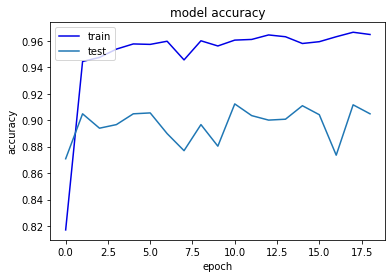

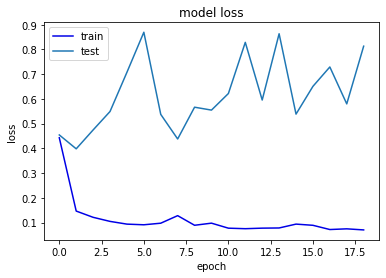

The accuracy of the model is 0.9097387194633484


In [23]:
# Build a new model with the HP, train it with the inital training set and eveluate it with the test set 

BestModelCNNLSTM, CNNLSTM_accuracy = evaluate_model(trainX,
                               trainy,
                               testX,
                               testy,
                               INPUT_SHAPE,
                               N_OUTPUTS,
                               Best_HP_CNNLSTM,
                               CNNLSTM,
                               Best_Epoch_CNNLSTM,
                               batch_size)


In [24]:
# create a unique file name by attaching the first four accuracy digits

file_name_ending = str(int(CNNLSTM_accuracy * 10000))

In [26]:
# save the model by using the unique file name (model name + accuracy)
BestModelCNNLSTM.save("/content/CrispCerebella/Models/Final_Model_CNNLSTM_" + file_name_ending)

INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/assets


INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/assets


In [27]:
# create a zip file out of the saved model

!zip -r /content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}.zip /content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}

  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/saved_model.pb (deflated 90%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/variables/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/variables/variables.index (deflated 66%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/assets/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9097/keras_metadata.pb (deflated 84%)


In [28]:
# downloading the zip file (to store it locally and be able to push it to git)

files.download(f"/content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# unzip the folder of the model with a given accuracy
# !unzip /content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}.zip -d /Test

In [ ]:
# load the saved model
# test_model = keras.models.load_model(f'/content/CrispCerebella/Test/content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}')

In [ ]:
# evaluate the saved model
# test_model.evaluate(testX, testy)